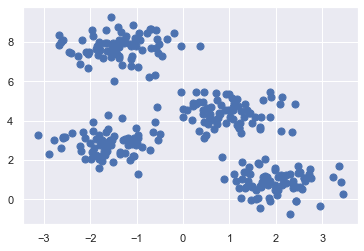

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

#for plot styling
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [16]:
#assign four clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


In [17]:
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0])

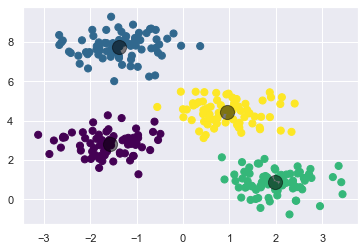

In [20]:


#import library
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
# 1.randomly choose clusters
    while True:
        labels = pairwise_distances_argmin(X, centers)
        # 2. assign labels based on closest center
        
        
        
        # 3. new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        
        
        
        # 4 check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    
      

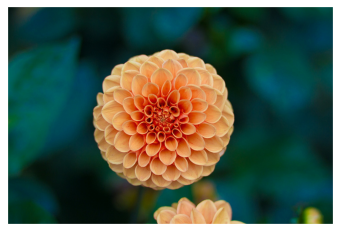

In [22]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [23]:
data = china /255.0 # use 0 ...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [29]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    #choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.subtitle(title, size=20);


AttributeError: 'Figure' object has no attribute 'subtitle'

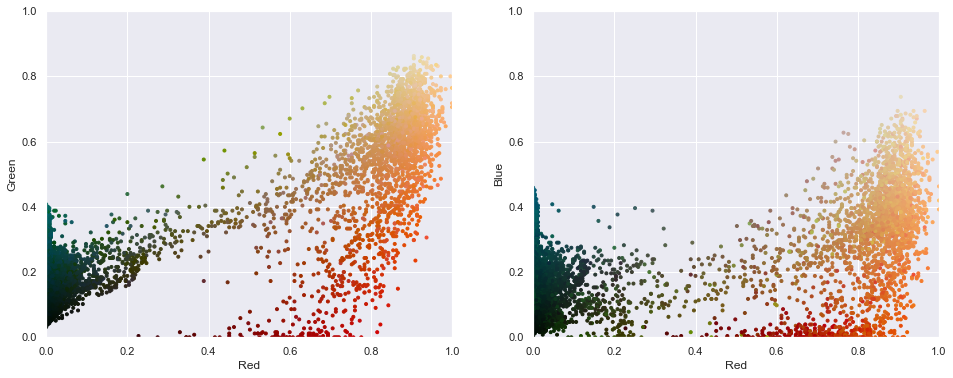

In [30]:
    plot_pixels(data, title='Input color space: 16 million possible colors')

AttributeError: 'Figure' object has no attribute 'subtitle'

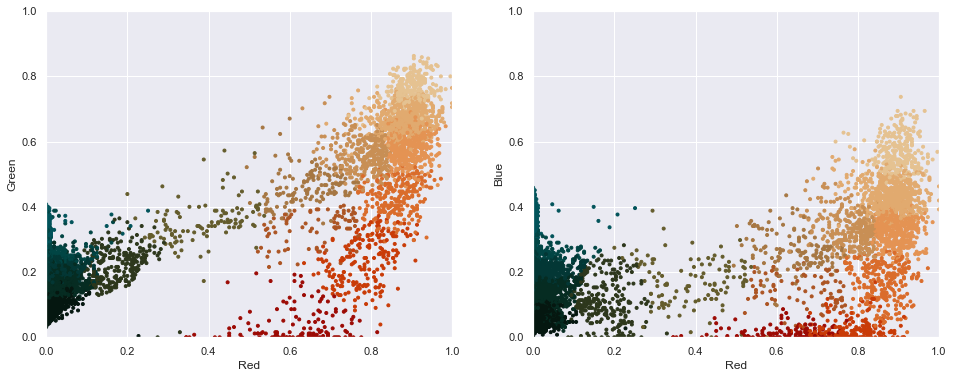

In [28]:
#fix numpy issues
import warnings; warnings.simplefilter('ignore')

#reducee these 16 million colors to just 10 colors
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")


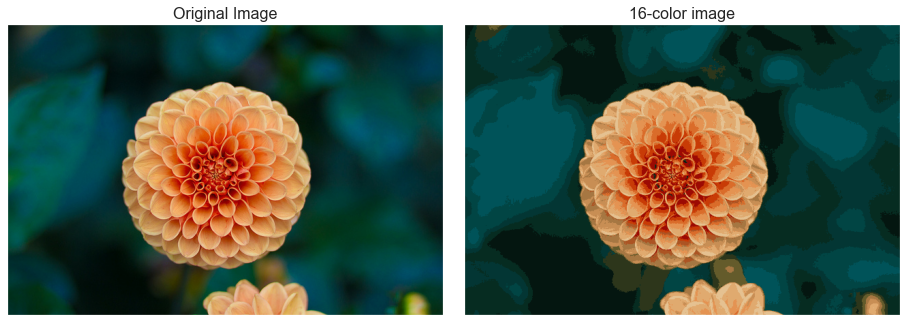

In [33]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                      subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color image', size=16);